## Qual o melhor gênero para ter o desempenho de vendas Global?!
### Qual o melhor gênero para se lançar um novo jogo de vídeo game, onde:
<ul>
<li>As vendas tenham um desempenho significativo em todas as regiões de vendas listadas no dataset, por localidade do Publisher
</li>
<li>Existem diferença de vendas de Gênero por localidade?</li>
<li>Existem diferença de vendas por milhão de habitantes por localidade?</li>
</ul>

In [1]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import os
import scikit_posthocs as sp
import seaborn as sns
from scipy.stats import norm, skew
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r"C:\Users\Eduardo\Data Science\Estatística\Dataset")

#Carregando o Dataframe com todos os dados
df = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17410 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [4]:
#Carregando o Dataframe que traz a localidade do Publisher
dfN = pd.read_csv("Publisher_local.csv", sep=',')

#Fazendo um merge para trazer a localidade do Publisher ao dataframe principal
df = pd.merge(df, dfN, on='Publisher', how='left')

In [5]:
#Carregando o Dataframe que traz os Fabricantes por Plataforma
dfF = pd.read_csv("Fabricante_Plataforma.csv", sep=';')

#Fazendo um merge para trazer os Fabricantes ao dataframe principal
df = pd.merge(df, dfF, on='Platform')

In [6]:
#Fazendo uma Análise Descritiva da variável Dependente (Global Sales) e das Vendas em outras localidades
resultadoAD = pd.DataFrame(np.array([['Base com todos os Dados',df['Global_Sales'].describe()['count'],
                                               df['Global_Sales'].describe()['mean'],
                                               df['Global_Sales'].median(),
                                               df['Global_Sales'].mode()[0],
                                               df['Global_Sales'].describe()['std'],
                                               df['Global_Sales'].describe()['min'],
                                               df['Global_Sales'].describe()['25%'],
                                               df['Global_Sales'].describe()['50%'],
                                               df['Global_Sales'].describe()['75%'],
                                               df['Global_Sales'].describe()['max'],
                                               df['Global_Sales'].describe()['max'] - df['Global_Sales'].describe()['min'],
                                               df['Global_Sales'].quantile(q=0.88)]
                                   ]), columns =['Tipo', 'Count','Mean','Median','Mode','Std','Min','25%','50%','75%','Max','Amplitude', 'Percentil 88%'])
resultadoAD

,Tipo,Count,Mean,Median,Mode,Std,Min,25%,50%,75%,Max,Amplitude,Percentil 88%
0,Base com todos os Dados,17416.0,0.5164693385393178,0.16,0.01,1.5261242430618913,0.01,0.05,0.16,0.45,82.54,82.53,0.99


In [7]:
#Setando a população (em milhoes)
JP_population = 127.0
EU_population = 742.0
NA_population = 579.0
Global_population = 7426.0
Other_population = Global_population - (JP_population + EU_population + NA_population)

# Pontos Observados até aqui
#### Olhando a média moda e mediana constatei que das nossas 17425 observações grande parte delas são menores que 1M em vendas, o valor só se torna 1M ou > a partir do percentil 88, o que da para concluir logo de início que são poucos os games que atigem a marca de 1M> de vendas.
#### A mediana e moda deixam muito claro que a maioria dos games observados estão muito abaixo de 1M de unidades em vendas
#### Desconsiderei a média da análise pois a amplitude dos dados é de 0.01 à 82.53, portanto a mesma pode estar sendo maquiada pelos valores elevados (A prova foi feita observando o segundo e terceiro quartil, pois mesmo o 3º quartil não alcançou o valor da média)
#### O desvio Padrão nos diz que a vendas variam em 1.52M, o que é alto considerado que 75% dos valores estão abaixo de 0.45 
#### Pela estatística descritiva fica muito claro que temos vários Outliers acima de certo valor , o ponto é, que valor podemos considerar para os outliers?

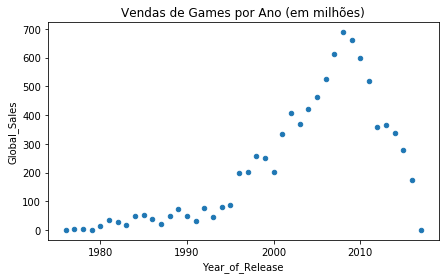

In [8]:
#genero = vgl[vgl['Genre']==l2.loc[i,'index']]
g2 =df[['Year_of_Release','Global_Sales']].groupby(['Year_of_Release'],as_index=False).sum()
g2.plot(x='Year_of_Release',y='Global_Sales',kind='scatter',figsize=(7,4),title = 'Vendas de Games por Ano (em milhões)')

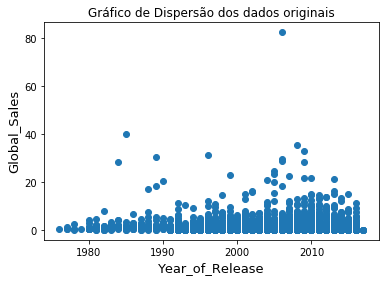

In [9]:
#Verificando o outlier que existe na base
fig, ax = plt.subplots()
ax.scatter(x = df['Year_of_Release'], y = df['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados originais')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [10]:
#Criando colunas novas com o percentual de vendas por milhão de habitantes
df['Percent_Global'] = round((df['Global_Sales'] / Global_population), 8)
df['Percent_EU'] = round((df['EU_Sales'] / EU_population) * 100, 8)
df['Percent_JP'] = round((df['JP_Sales'] / JP_population) * 100, 8)
df['Percent_NA'] = round((df['NA_Sales'] / NA_population)* 100, 8)
df['Percent_Other'] = round((df['Other_Sales'] / Other_population) * 100, 8)

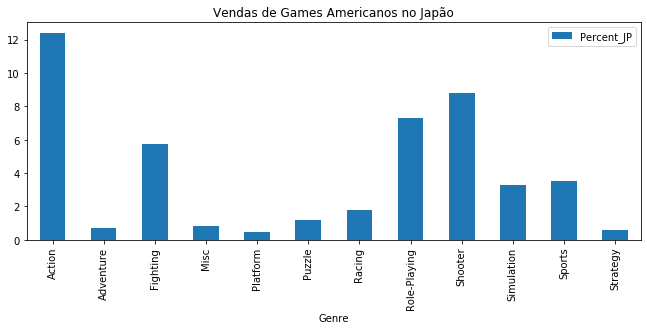

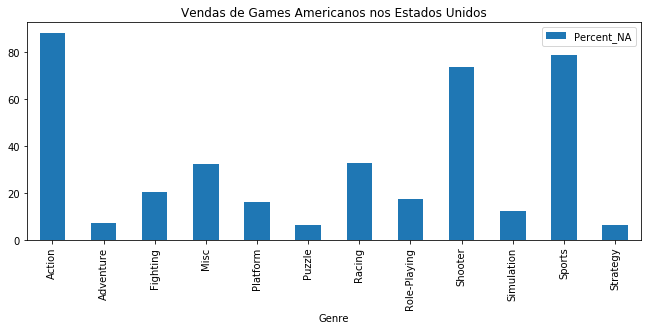

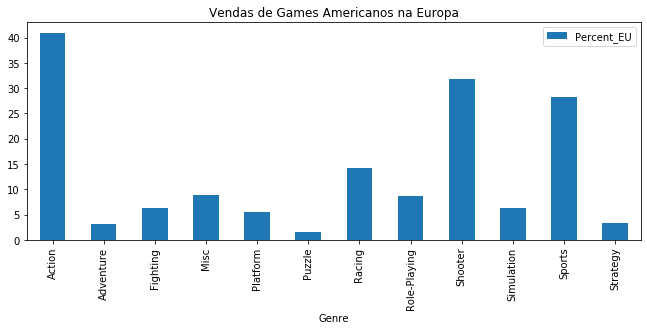

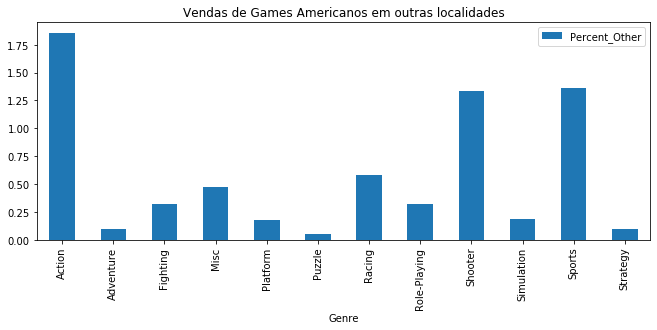

In [11]:
#Gráfico de Venda de Games por Localidade
dados5 = df[df['Publisher_Local']=='America']
dados51= dados5[['Genre','Percent_JP']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_JP',kind='bar',figsize=(11,4),title='Vendas de Games Americanos no Japão')

dados5 = df[df['Publisher_Local']=='America']
dados51= dados5[['Genre','Percent_NA']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_NA',kind='bar',figsize=(11,4),title='Vendas de Games Americanos nos Estados Unidos')

dados5 = df[df['Publisher_Local']=='America']
dados51= dados5[['Genre','Percent_EU']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_EU',kind='bar',figsize=(11,4),title='Vendas de Games Americanos na Europa')

dados5 = df[df['Publisher_Local']=='America']
dados51= dados5[['Genre','Percent_Other']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_Other',kind='bar',figsize=(11,4),title='Vendas de Games Americanos em outras localidades')

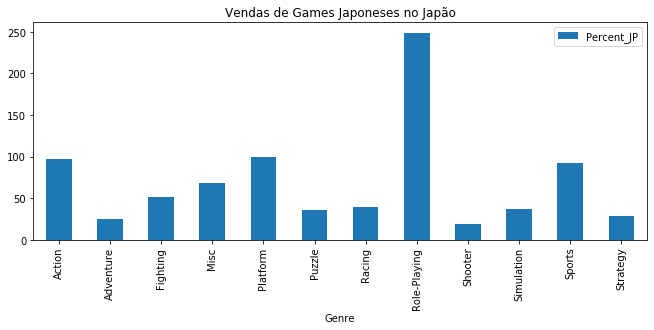

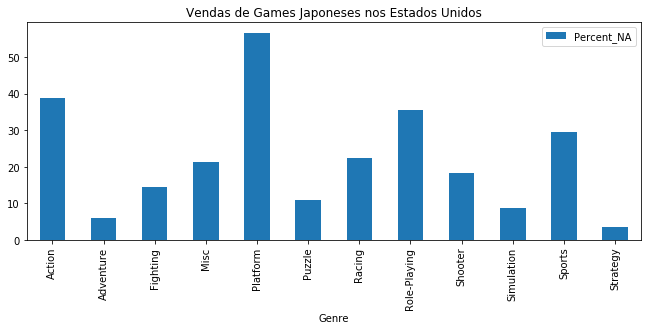

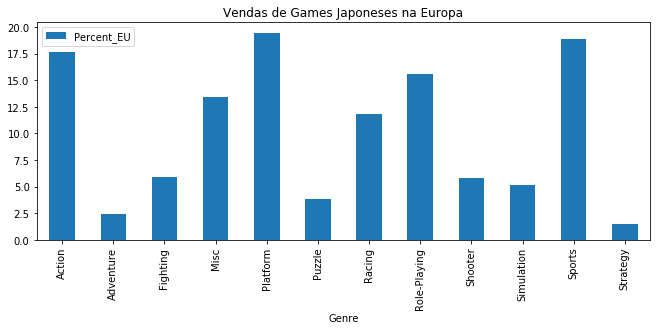

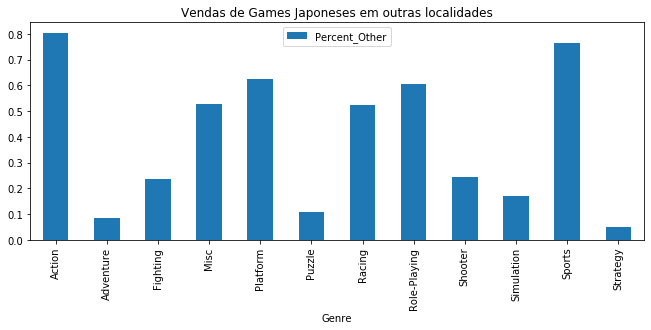

In [12]:
#Gráfico de Venda de Games por Localidade
dados5 = df[df['Publisher_Local']=='Japan']
dados51= dados5[['Genre','Percent_JP']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_JP',kind='bar',figsize=(11,4),title='Vendas de Games Japoneses no Japão')

dados5 = df[df['Publisher_Local']=='Japan']
dados51= dados5[['Genre','Percent_NA']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_NA',kind='bar',figsize=(11,4),title='Vendas de Games Japoneses nos Estados Unidos')

dados5 = df[df['Publisher_Local']=='Japan']
dados51= dados5[['Genre','Percent_EU']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_EU',kind='bar',figsize=(11,4),title='Vendas de Games Japoneses na Europa')

dados5 = df[df['Publisher_Local']=='Japan']
dados51= dados5[['Genre','Percent_Other']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_Other',kind='bar',figsize=(11,4),title='Vendas de Games Japoneses em outras localidades')

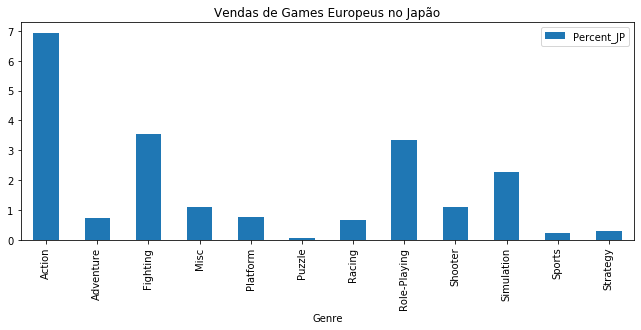

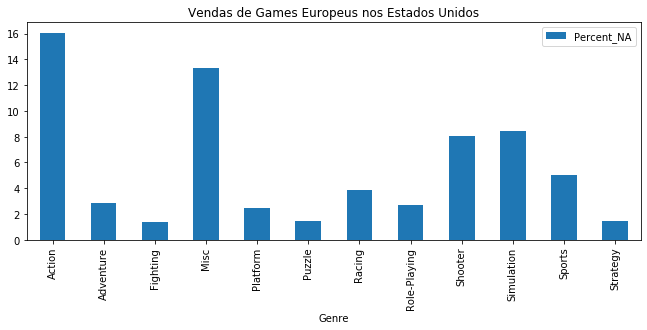

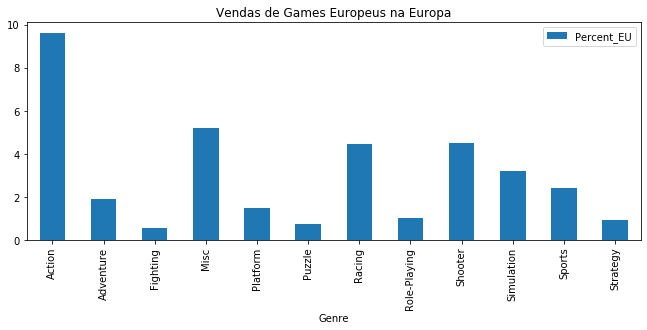

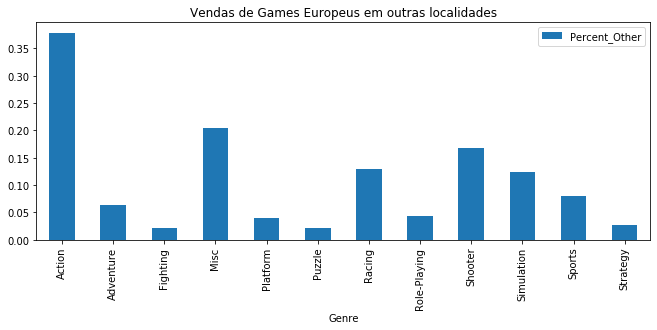

In [13]:
#Gráfico de Venda de Games por Localidade
dados5 = df[df['Publisher_Local']=='Europe']
dados51= dados5[['Genre','Percent_JP']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_JP',kind='bar',figsize=(11,4),title='Vendas de Games Europeus no Japão')

dados5 = df[df['Publisher_Local']=='Europe']
dados51= dados5[['Genre','Percent_NA']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_NA',kind='bar',figsize=(11,4),title='Vendas de Games Europeus nos Estados Unidos')

dados5 = df[df['Publisher_Local']=='Europe']
dados51= dados5[['Genre','Percent_EU']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_EU',kind='bar',figsize=(11,4),title='Vendas de Games Europeus na Europa')

dados5 = df[df['Publisher_Local']=='Europe']
dados51= dados5[['Genre','Percent_Other']].groupby(['Genre'],as_index=False).sum()
dados51.plot(x='Genre',y='Percent_Other',kind='bar',figsize=(11,4),title='Vendas de Games Europeus em outras localidades')

In [14]:
#Pegando apenas os jogos que foram lançados acima de 1990
df = df[(df['Year_of_Release'] >= 1990)]

#Convertendo Year_of_Release para valores inteiros
df['Year_of_Release'] = df['Year_of_Release'].astype(int)


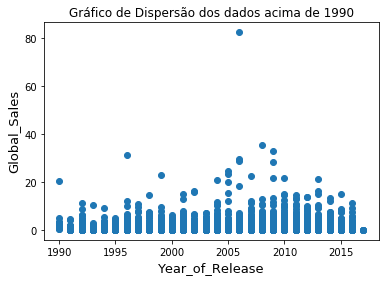

In [15]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df['Year_of_Release'], y = df['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados acima de 1990')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [16]:
#Criando um dataframe apenas com os jogos com vendas Globais acima de 400 mil
df_3 = df[(df['Global_Sales'] > 0.4)]

#Removendo a linha que contém o jogo Wii Sports, pois o jogo foi lançado em conjunto com o Console, por ser uma novidade
df_3 = df_3.set_index('Name')
df_3 = df_3.drop('Wii Sports', axis=0)

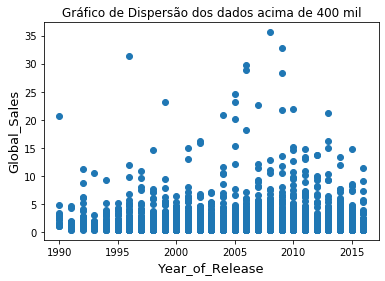

In [17]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df_3['Year_of_Release'], y = df_3['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados acima de 400 mil')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [18]:
#Criando um dataframe com vendas Globais entre 400mil e 10 milhões
df_4 = df[(df['Global_Sales'] > 0.4) & (df['Global_Sales'] < 10)]


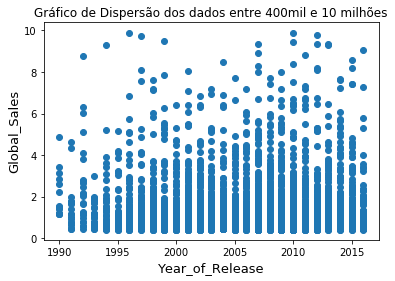

In [19]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df_4['Year_of_Release'], y = df_4['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados entre 400mil e 10 milhões')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [20]:
#Criando um dataframe com vendas Globais entre 400mil e 5 milhões
df_5 = df[(df['Global_Sales'] > 0.4) & (df['Global_Sales'] < 5)]

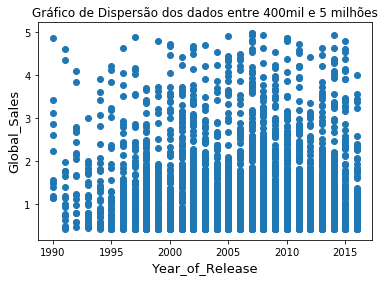

In [21]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df_5['Year_of_Release'], y = df_5['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados entre 400mil e 5 milhões')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [22]:
#Criando um dataframe com vendas Globais acima de 5 milhões
df_6 = df_4[df_4['Global_Sales'] >= 5 ]

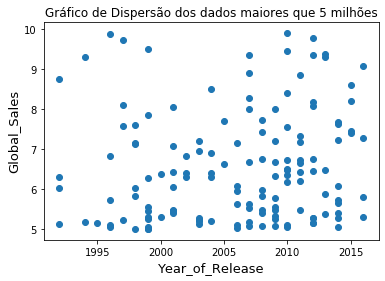

In [23]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 5 milhões
fig, ax = plt.subplots()
ax.scatter(x = df_6['Year_of_Release'], y = df_6['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados maiores que 5 milhões')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [24]:
#Criando um dataframe com vendas Globais entre 400mil e 2 milhões
df_7 = df[(df['Global_Sales'] > 0.4) & (df['Global_Sales'] < 2)]

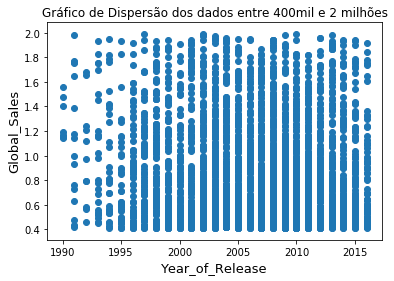

In [25]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df_7['Year_of_Release'], y = df_7['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados entre 400mil e 2 milhões')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [26]:
#Criando um dataframe com vendas Globais entre 500mil e 2 milhões
df_8 = df[(df['Global_Sales'] > 0.5) & (df['Global_Sales'] < 2)]

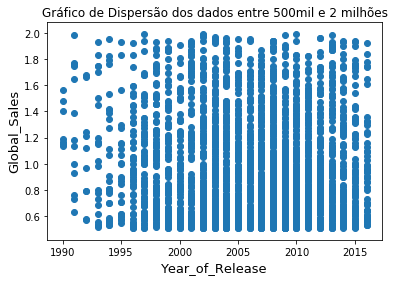

In [27]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df_8['Year_of_Release'], y = df_8['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados entre 500mil e 2 milhões')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [28]:
#Criando um dataframe com vendas Globais entre 500mil e 2 milhões e removendo as linhas onde o Critic Score é nulo
df_9 = df_8.dropna(subset=['Critic_Score'])

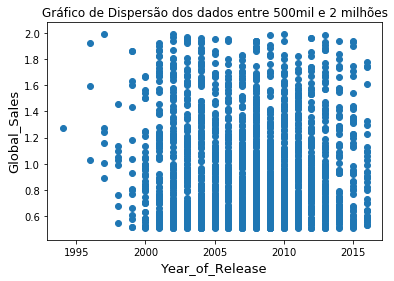

In [29]:
#Verificando como se comporta o gráfico depois da remoção do Outlier e com vendas acima de 400mil
fig, ax = plt.subplots()
ax.scatter(x = df_9['Year_of_Release'], y = df_9['Global_Sales'])
plt.title('Gráfico de Dispersão dos dados entre 500mil e 2 milhões')
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Year_of_Release', fontsize=13)
plt.show()

In [30]:
#Criando colunas novas com o percentual de vendas por milhão de habitantes
df_9['Percent_Global'] = round((df_9['Global_Sales'] / Global_population), 8)
df_9['Percent_EU'] = round((df_9['EU_Sales'] / EU_population) * 100, 8)
df_9['Percent_JP'] = round((df_9['JP_Sales'] / JP_population) * 100, 8)
df_9['Percent_NA'] = round((df_9['NA_Sales'] / NA_population)* 100, 8)
df_9['Percent_Other'] = round((df_9['Other_Sales'] / Other_population) * 100, 8)

Global_Sales    1.000000
NA_Sales        0.672116
EU_Sales        0.560100
Other_Sales     0.458419
Critic_Score    0.171256
Critic_Count    0.163201
JP_Sales        0.157992
User_Count      0.089382
User_Score      0.073891
Name: Global_Sales, dtype: float64

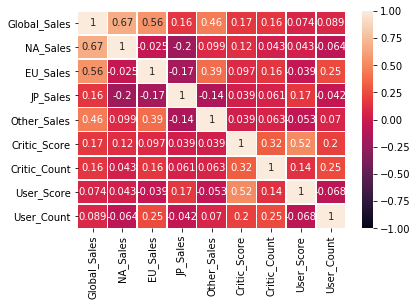

In [31]:
X = ['Global_Sales','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','Critic_Count','User_Score','User_Count']
df_9[X].corr()

corrMatrix = df_9[X].corr()

sns.heatmap(corrMatrix, vmin = -1, annot = True, linewidths=.5)

abs(corrMatrix['Global_Sales']).sort_values(ascending = False)

In [32]:
#Rodando o Teste de normalidade Shapiro utilizando o Critic Score
x = df_9['Critic_Score']
stats, p = shapiro(x)
print(stats, p)
alpha = 0.05
if p > alpha:
    print('Aceita hipótese nula (aceita H0), ou seja, com 95% de confiança os dados são similares a uma distribuição normal')
else:
    print('Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal')

0.9499787092208862 1.6029428029175873e-25
Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal


In [33]:
#Rodando o Teste de normalidade Shapiro utilizando o Global Sales
x = df_9['Global_Sales']
stats, p = shapiro(x)
print(stats, p)
alpha = 0.05
if p > alpha:
    print('Aceita hipótese nula (aceita H0), ou seja, com 95% de confiança os dados são similares a uma distribuição normal')
else:
    print('Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal')

0.9088784456253052 5.8558973920120176e-33
Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal


In [34]:
#teste de Kruskal-Wallis com o valor de Vendas Global por localidade do publisher, utilizando a base acima de 1990
from scipy import stats
df['Publisher_Local'] = df['Publisher_Local'].astype('category')
df["pub_cat"] = df["Publisher_Local"].cat.codes

kw, p = stats.kruskal(df["Global_Sales"], df['pub_cat'])

print ('Kruskal-Wallis')
print ('==============')
print ('KW value:', kw)
print ('p value:', p, '\n')
if p > alpha:
    print('Aceita hipótese nula (aceita H0), ou seja, com 95% de confiança os dados são similares a uma distribuição normal')
else:
    print('Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal')

Kruskal-Wallis
KW value: 1081.7640859713972
p value: 3.03659314715041e-237 

Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal


In [35]:
#teste de Kruskal-Wallis com o percentual de Vendas Global por localidade do publisher
from scipy import stats
df_9['Publisher_Local'] = df_9['Publisher_Local'].astype('category')
df_9["pub_cat"] = df_9["Publisher_Local"].cat.codes

kw, p = stats.kruskal(df_9['Percent_Global'], df_9['pub_cat'])

print ('Kruskal-Wallis')
print ('==============')
print ('KW value:', kw)
print ('p value:', p, '\n')
if p > alpha:
    print('Aceita hipótese nula (aceita H0), ou seja, com 95% de confiança os dados são similares a uma distribuição normal')
else:
    print('Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal')

Kruskal-Wallis
KW value: 115.2597128335018
p value: 6.903719328641061e-27 

Rejeita hipótese nula (rejeita H0), ou seja, com 95% de confiança os dados NÃO são similares a uma distribuição normal


In [36]:
df_9['pub_cat'].unique()

array([ 0,  2,  1, -1], dtype=int8)

In [37]:
#Teste de Dunn
x = [df_9[df_9['pub_cat']==0]['Percent_Global'],
     df_9[df_9['pub_cat']==1]['Percent_Global'],
     df_9[df_9['pub_cat']==2]['Percent_Global']]
sp.posthoc_dunn(x, p_adjust='holm')


,1,2,3
1,-1.000000,0.658202,0.781665
2,0.658202,-1.000000,0.658202
3,0.781665,0.658202,-1.000000
